# Preliminary Exploration of `Where we Move` Game

in this notebook, I am going to read, clean and plot the initial charts for the game sessions being held on IHE Delft and Municipality. the further steps are being explained in next steps.

#### 1- reading and take an overview to the data collected

importing the liberaries

In [81]:
%matplotlib inline

import pandas as pd
import os 
import palettable as pl
import seaborn as sns
from seaborn import palplot
import matplotlib.pyplot as plt

reading the csv data (firstly exported from SPSS to csv format)
important; to be easy for third person reviewing my model, she would be accessible to the codes below, if she can upload the attached files to this model (eg. csv file) via her own device or pc. I am using the dynamic path, so you can open and start running this model, just when you coppied the csv, next to your python file location.

In [8]:
#write down your file location in formatted below (be careful of backslash instead of dashes)

#path = 'D:\WaterEng\TUDelft\EPACourses\9- Capita Selecta (Where do we move)\week 6'


converting the xlsx to csv

In [15]:
game = pd.read_excel('Game data.xlsx')

game.to_csv('Game data.csv', index=False)

In [16]:
game = pd.read_csv('Game data.csv')

game

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3.0,NaN,1,4.0,180,105,300,80,...,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,2,1.0,3.0,1,NaN,180,105,300,80,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,2,1,5.0,NaN,2,2.0,120,65,200,50,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,2,2.0,3.0,2,2.0,120,65,200,50,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2,3,3.0,2.0,2,2.0,120,65,200,50,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,53,1,3.0,3.0,1,2.0,80,40,130,15,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
216,53,2,3.0,1.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
217,53,3,3.0,2.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
218,53,4,2.0,2.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


the data is consists of `53 individual` players, played the game for at least 3 to 5 rounds. data collected from IHE delft UNESCO institute for water education and municipality staffs.

In [17]:
game.dtypes

PlayerID                      int64
Round                         int64
Question1                   float64
Question2                   float64
Membership                    int64
GameTactic                  float64
Income                        int64
LivingCost                    int64
MaxMortgage                   int64
StartingSavings               int64
IncreaseSatisfaction          int64
PreferredHouseRating          int64
ActualHouseRating             int64
Savings                     float64
BeginSatisfaction             int64
EndSatisfaction             float64
Damage                        int64
SpendableIncome             float64
PayingDebt                  float64
PayingSatisfaction          float64
PayingMeasures              float64
RiverFloodedArea            float64
RiverFloodedHouse           float64
RainFloodedArea             float64
RainFloodedHouse            float64
Address                      object
GreenGarden                 float64
AutomaticSteelWalls         

Here there are several columns with NAN values inside. while I have already checked them through SPSS, `they used to be 0 values` in SPSS sheet, but now while exported to csv, is being shown as `NAN`.
the `best way` to tackle such data is to `convert them to 0 values`, since numbers are sth doable within pandas, but NANs are not!

so here, I am trying to convert NANs ro 0 values.

In [25]:
columns_to_fill = ['Address','Question1', 'Question2', 'GameTactic','Savings','EndSatisfaction','SpendableIncome','PayingDebt','PayingSatisfaction','PayingMeasures','RiverFloodedArea','RiverFloodedHouse','RainFloodedArea','RainFloodedHouse','GreenGarden','AutomaticSteelWalls','Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel','Riverfloodlag','RainFloodlag','GreenGarden_Lead','Automatic_Lead','Waterpump_Lead','Bulkhead_Lead','RiseGround_Lead','Waterproof_Lead','Sandbag_Lead','Rainbarrel_Lead'] 

game[columns_to_fill] = game[columns_to_fill].fillna(0)

In [26]:
game.head()

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3,0,1,4,180,105,300,80,...,0,0,1,2,2,2,2,2,2,2
1,1,2,1,3,1,0,180,105,300,80,...,2,2,2,2,2,2,1,2,2,2
2,2,1,5,0,2,2,120,65,200,50,...,2,2,1,2,2,2,2,2,2,2
3,2,2,2,3,2,2,120,65,200,50,...,2,2,2,2,2,2,2,2,2,1
4,2,3,3,2,2,2,120,65,200,50,...,2,1,2,2,2,2,2,2,2,2


In [27]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

In [28]:
columns_to_convert = ['Question1', 'Question2', 'GameTactic','Savings','EndSatisfaction','SpendableIncome','PayingDebt','PayingSatisfaction','PayingMeasures','RiverFloodedArea','RiverFloodedHouse','RainFloodedArea','RainFloodedHouse','GreenGarden','AutomaticSteelWalls','Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel','Riverfloodlag','RainFloodlag','GreenGarden_Lead','Automatic_Lead','Waterpump_Lead','Bulkhead_Lead','RiseGround_Lead','Waterproof_Lead','Sandbag_Lead','Rainbarrel_Lead'] 

game[columns_to_convert] = game[columns_to_convert].astype(int)

In [29]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

and the type of elements in dataframe are not integer, which later makes mistakes for claculation. first I need them to be integer type

In [59]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

datatypes are now mostly in integer format. which is convinient for calculation and functions. In this initial project

### 2- analysing the data based on table rounds

From reading the thesis, I realized that there are 7 tables which these data has been gained from. And the total number of players are 53. So approximately there are 8 players per table. 
Now for carrying out the data analytic of implemented private flood measures, I need the table rounds indicator in the data sheet. This is clearly shown in `Game column`. Now trying to sort upon different rounds played, by every each player.

filtering dataframe to only private measures and players number

the below data frame is all data with 
### `table 1`

In [106]:
filtered_game1 = game[game['Game'] == 1]
#filtered_game1

In [110]:
private_measures1 = filtered_game1[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures1 = private_measures1.sort_values(by='Round', ascending=True)
#private_measures1


In [186]:
#make the pallet more fruity!
cmap_tables = sns.cubehelix_palette(as_cmap=True)

cmap_overall_chart = sns.color_palette("viridis", as_cmap=True)


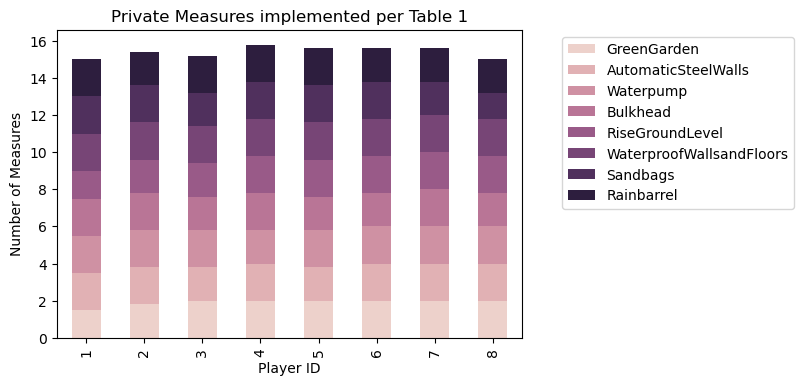

In [187]:
columns_to_group = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']
grouped_game1 = private_measures1.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game1.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)

plt.title('Private Measures implemented per Table 1')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 2`

In [120]:
filtered_game2 = game[game['Game'] == 2]
#filtered_game2

In [121]:
private_measures2 = filtered_game2[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures2 = private_measures2.sort_values(by='Round', ascending=True)
#private_measures2


lets have a bar chart!!

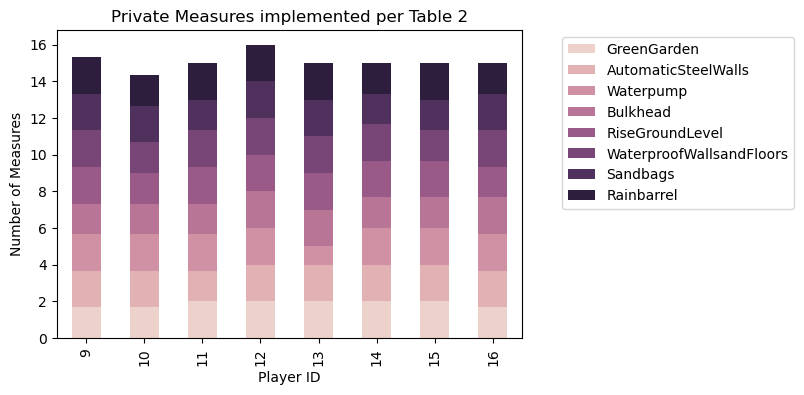

In [188]:
grouped_game2 = private_measures2.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game2.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 2')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 3`

In [124]:
filtered_game3 = game[game['Game'] == 3]
#filtered_game3

In [125]:
private_measures3 = filtered_game3[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures3 = private_measures3.sort_values(by='PlayerID', ascending=True)
#private_measures3


lets have a bar chart!!

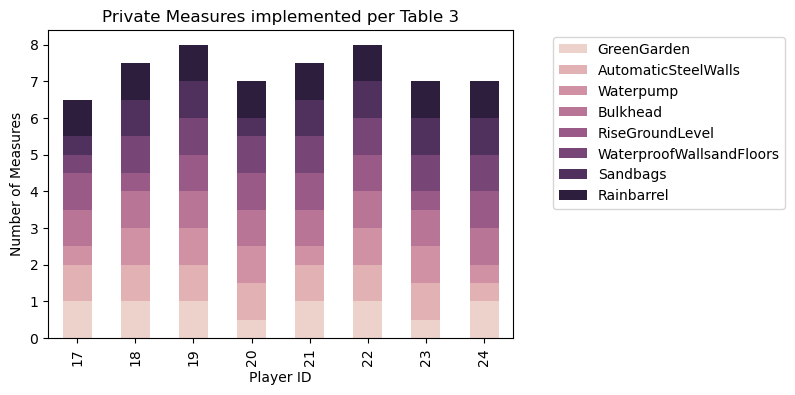

In [189]:
grouped_game3 = private_measures3.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game3.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 3')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 4`

In [130]:
filtered_game4 = game[game['Game'] == 4]
#filtered_game4

In [131]:
private_measures4 = filtered_game4[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures4 = private_measures4.sort_values(by='Round', ascending=True)
#private_measures4


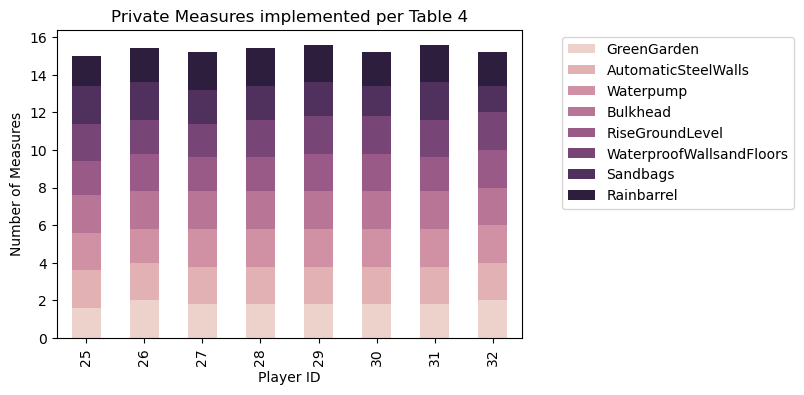

In [190]:
grouped_game4 = private_measures4.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game4.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 4')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 5`

In [154]:
filtered_game5 = game[game['Game'] == 5]
#filtered_game5

In [155]:
private_measures5 = filtered_game5[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures5 = private_measures5.sort_values(by='Round', ascending=True)
#private_measures5


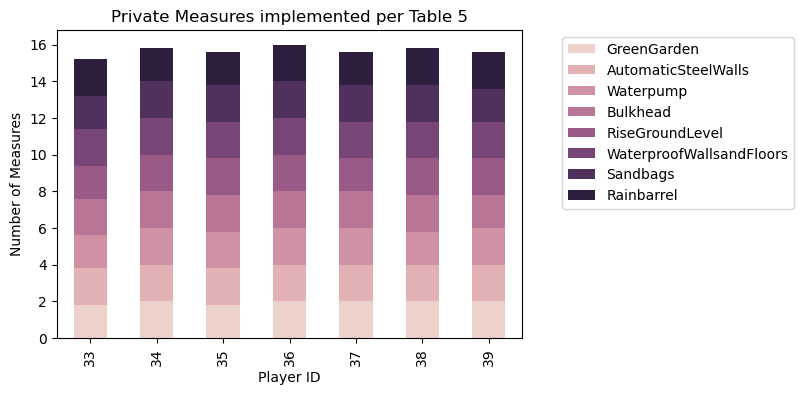

In [192]:
grouped_game5 = private_measures5.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game5.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 5')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 6`

In [142]:
filtered_game6 = game[game['Game'] == 6]
#filtered_game6

In [143]:
private_measures6 = filtered_game6[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures6 = private_measures6.sort_values(by='Round', ascending=True)
#private_measures6


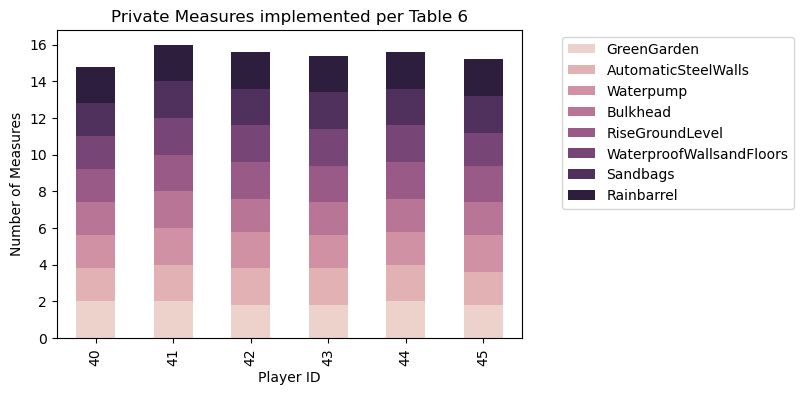

In [193]:
grouped_game6 = private_measures6.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game6.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 6')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 7`

In [145]:
filtered_game7 = game[game['Game'] == 7]
#filtered_game7

In [148]:
private_measures7 = filtered_game7[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures7 = private_measures7.sort_values(by='Round', ascending=True)
#private_measures7


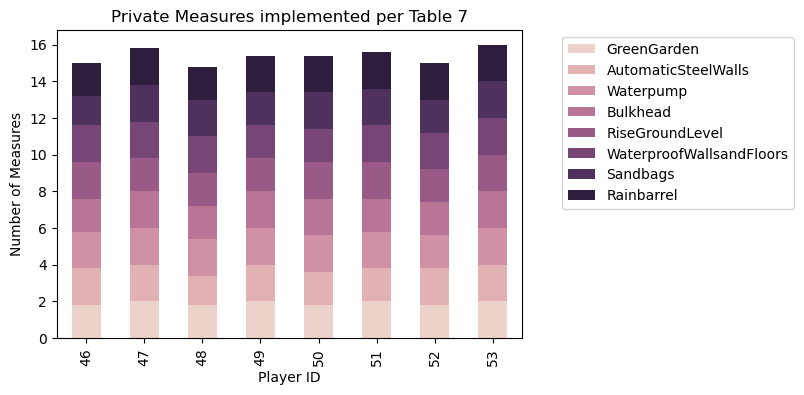

In [194]:
grouped_game7 = private_measures7.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
grouped_game7.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 7')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

below, Im proposing to have the whole players in a single plot
### `all players`


In [195]:
private_measures_overall = game[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures_overall = game.sort_values(by='Round', ascending=True)
private_measures_overall

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3,0,1,4,180,105,300,80,...,0,0,1,2,2,2,2,2,2,2
43,11,1,4,4,3,2,80,40,130,15,...,2,1,2,2,2,2,2,2,1,2
37,9,1,1,4,2,0,100,50,170,30,...,1,2,2,2,2,2,2,2,2,2
40,10,1,2,2,3,4,180,105,300,80,...,2,1,2,2,2,2,2,2,2,1
140,38,1,1,1,1,1,80,40,130,15,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,44,5,1,2,1,2,65,30,110,5,...,2,2,1,2,2,2,2,1,2,2
26,6,5,3,3,1,4,100,50,170,30,...,2,2,2,2,2,2,2,2,2,2
21,5,5,2,2,2,2,65,30,110,5,...,2,2,2,2,2,2,2,2,2,1
189,47,5,1,2,1,3,100,50,170,30,...,2,1,2,2,2,2,2,2,2,2


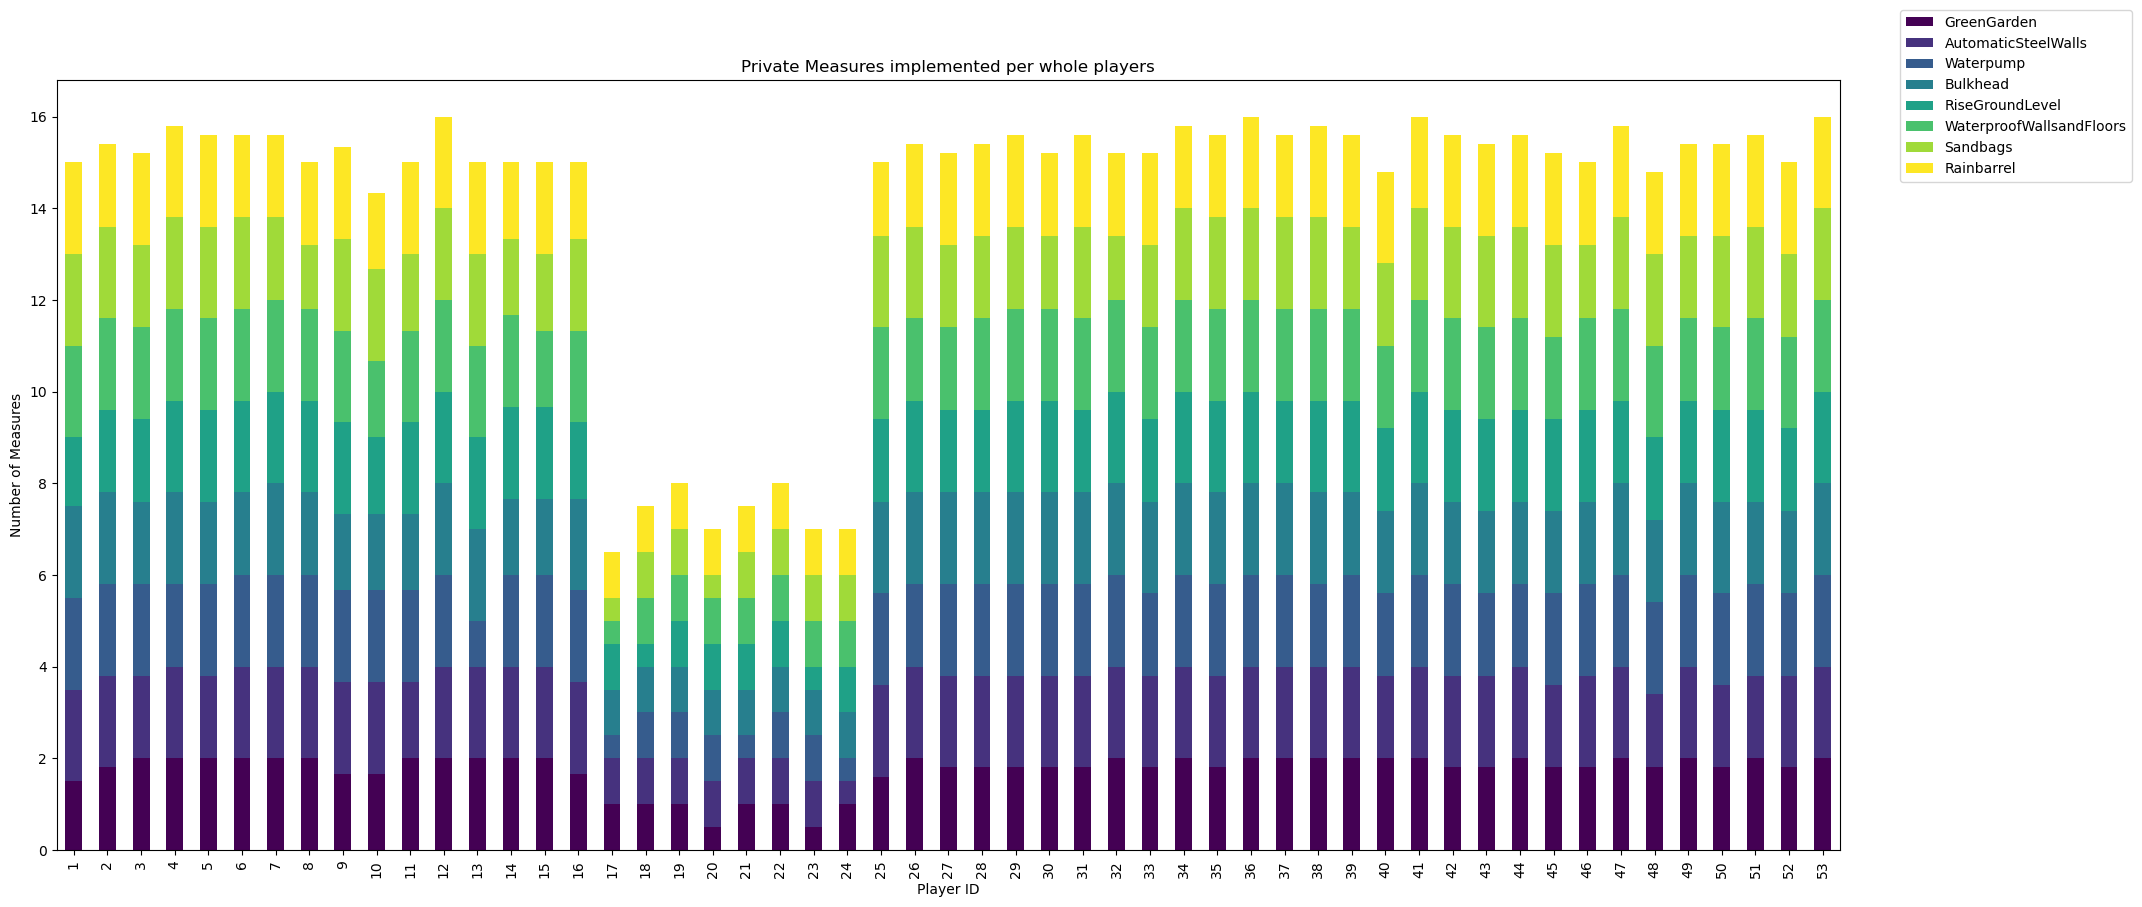

In [198]:
columns_to_group = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']
game_overall = private_measures_overall.groupby('PlayerID')[columns_to_group].mean()

# Plotting the horizontal bar chart
game_overall.plot(kind='bar', stacked=True, figsize=(23, 10), cmap=cmap_overall_chart)

plt.title('Private Measures implemented per whole players')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.168,1.1))  
plt.show()

### 3- analysing the data based on Latent Classes